In [8]:
import numpy as np
import pandas as pd

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
import warnings

In [13]:
warnings.filterwarnings("ignore")

In [281]:
test=pd.read_csv("test_lAUu6dG.csv")

In [21]:
train=pd.read_csv("train_ctrUa4K.csv")

In [346]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [22]:
train_orignal=train.copy()

In [23]:
test_orignal=test.copy()

In [24]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [282]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
train.shape

(614, 13)

In [283]:
test.shape

(367, 12)

In [29]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

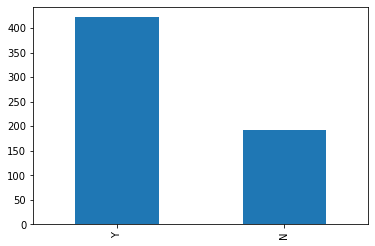

In [32]:
train['Loan_Status'].value_counts().plot.bar()

In [33]:
#Making other inferences from the data by plotting their graphs

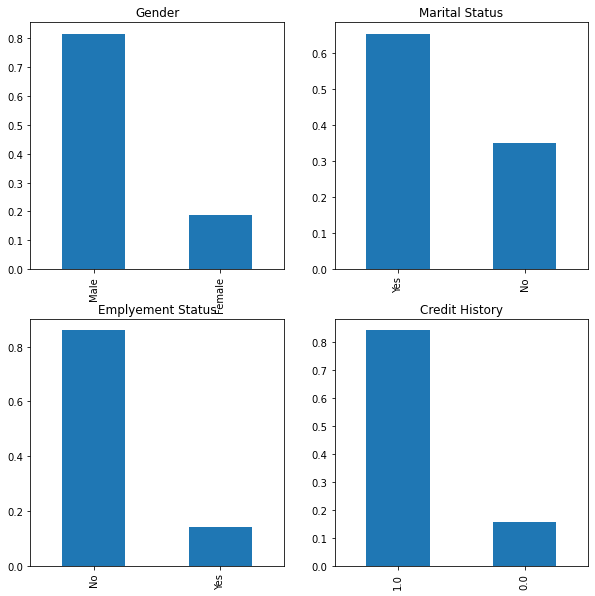

In [52]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Marital Status')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Emplyement Status')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Credit History')
plt.show()

<AxesSubplot:title={'center':'Property Area'}>

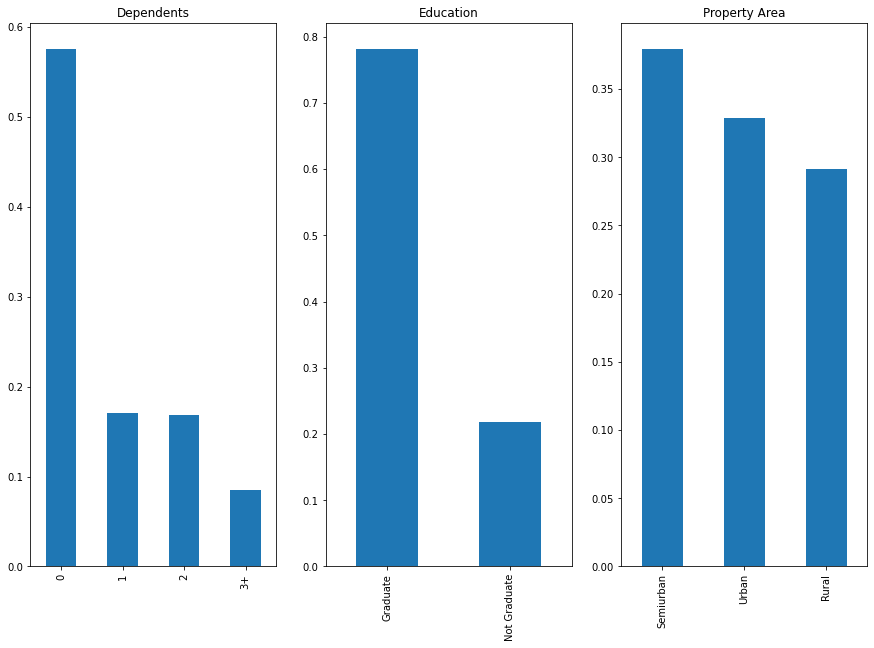

In [58]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Property Area')

<AxesSubplot:>

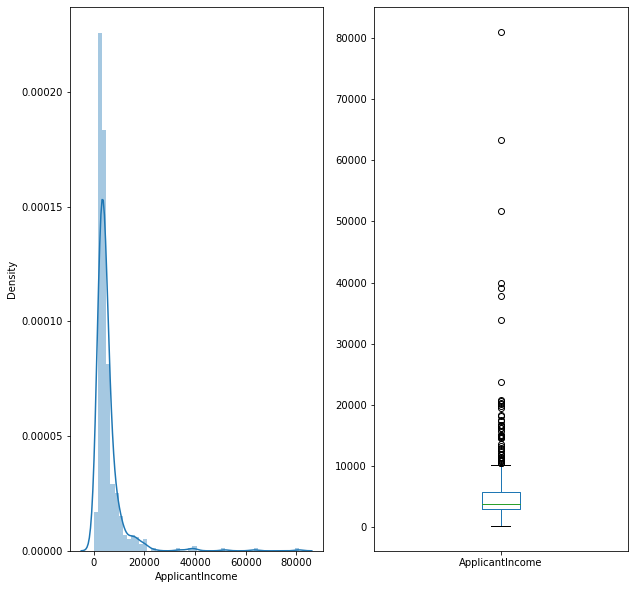

In [62]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(10,10))

In [ ]:
# Distribution is shifted towards the left showing that it is not normal distrbution. The boxplot shows that data has a lot of outliers.

Text(0.5, 0.98, '')

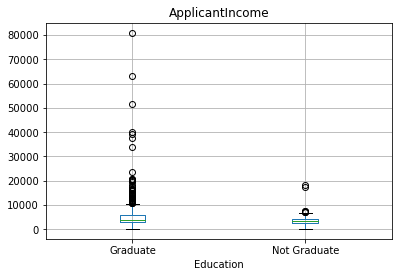

In [71]:
train.boxplot(column='ApplicantIncome', by='Education') 
plt.suptitle("")

In [72]:
# We can see that most of people having high incomes are graduates
#and those are the main outliers.

<AxesSubplot:>

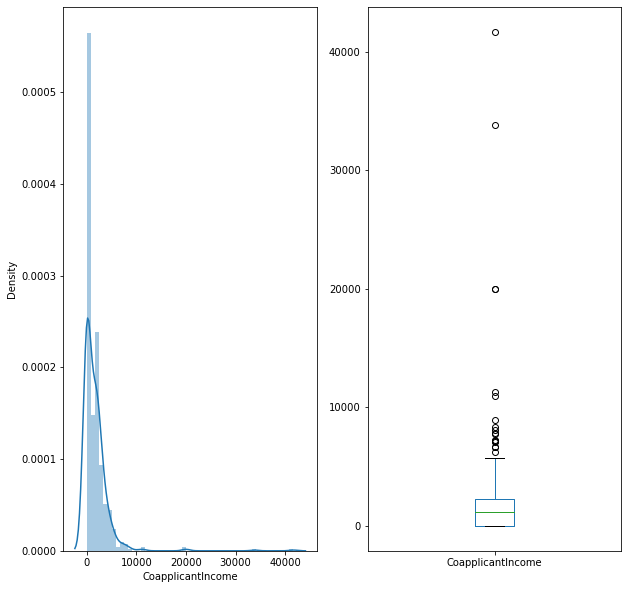

In [73]:
#Checking the distribution for the co-applicant
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,10))

<AxesSubplot:>

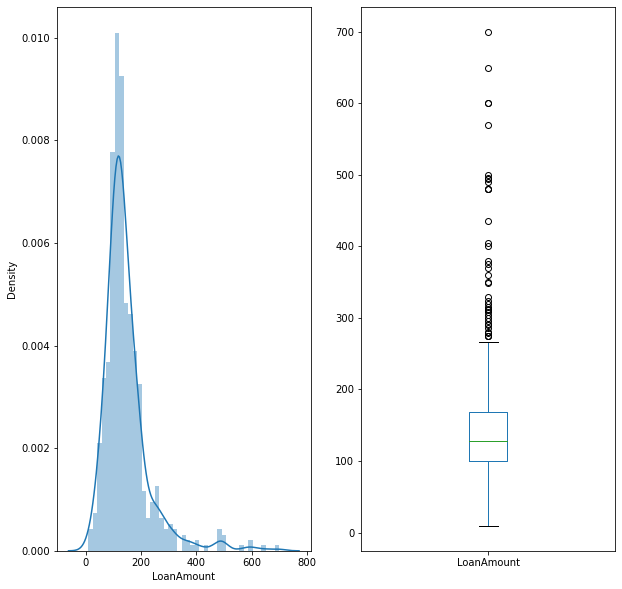

In [81]:
# lOAN Amount distribution
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(10,10))

In [86]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

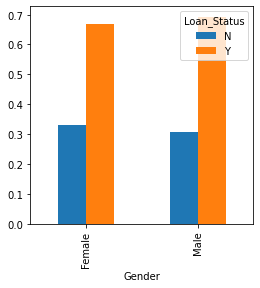

In [95]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

In [97]:
Married=pd.crosstab(train['Married'],train['Loan_Status']);Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<AxesSubplot:xlabel='Married'>

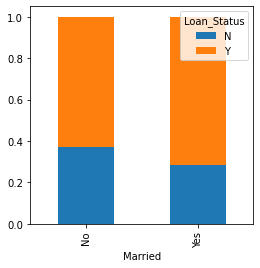

In [101]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

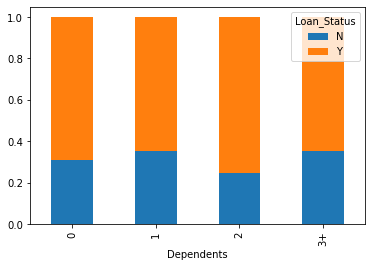

In [114]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']);Dependents


Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Education'>

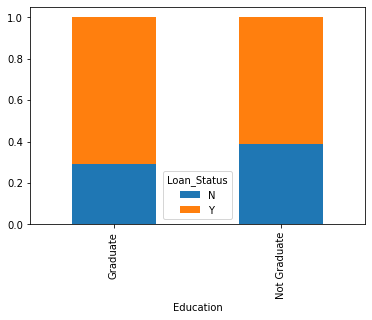

In [117]:
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Self_Employed'>

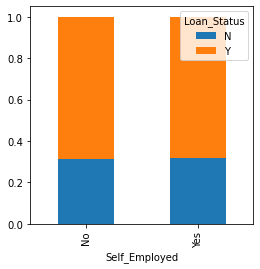

In [120]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Credit_History'>

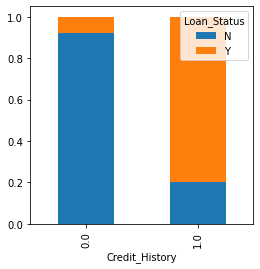

In [122]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status']);Credit_History
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

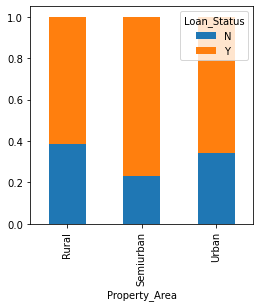

In [125]:
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status']); Property_Area
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

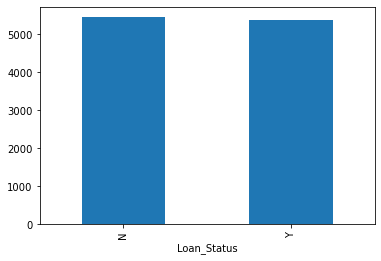

In [127]:
#Finding the MEAN income of people for whom the loan has got approved and rejected

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [133]:
#As we see that mean income isnt helping us identify the difference between the approved and rejected loans hence we will try to create groups of incomes and see if that helps.

bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status']); Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


Text(0, 0.5, 'Percentage')

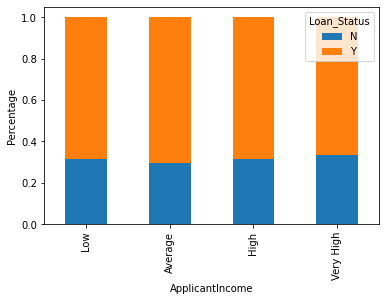

In [144]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [146]:
# We can see that even this is not very helpful, now we try to do a similar analysis for co-applicant income and Loan Amount

bins=[0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status']); Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
Low,3,19
Average,61,161
High,32,65


Text(0, 0.5, 'Percentage')

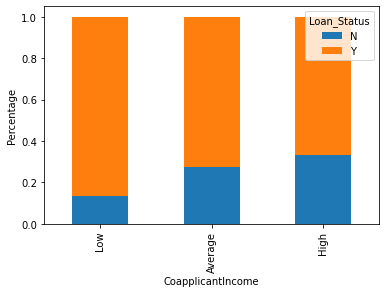

In [147]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [152]:
#It shows that if coapplicants income is less the chances of loan approval is high which doesnt make sense.
# Hence now we will try to calculate the Total Income and see if that helps us get a clear picture.

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

train['Total_Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

In [153]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status']); Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


Text(0, 0.5, 'Percentage')

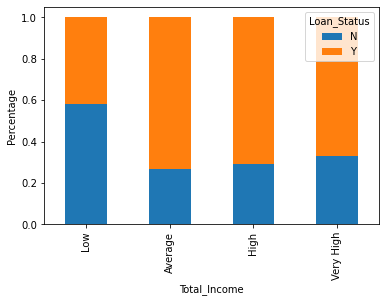

In [154]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [155]:
# From the above we can clearly see that if the Total Income of the family is low then in that case the chances of the loan being rejected is more which is exactly what we expect.

# Now we try to a similar analysis and compare loan Amount and Loan Status

bins=[0,100,200,700]
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status']); LoanAmount_bin


Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,103,255
High,31,49


Text(0, 0.5, 'Percentage')

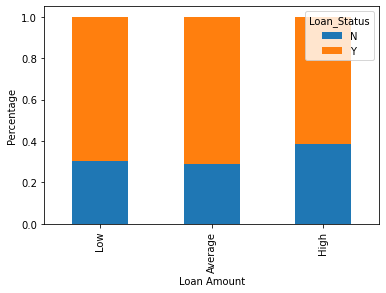

In [156]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

In [157]:
# From the above we can see that the propertion of loans approved for lower Loan Amounts is higher.

In [159]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [353]:
train['Dependents'].replace('3+',3, inplace=True)

test['Dependents'].replace('3+',3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)

train['Loan_Status'].replace('Y', 1, inplace=True)


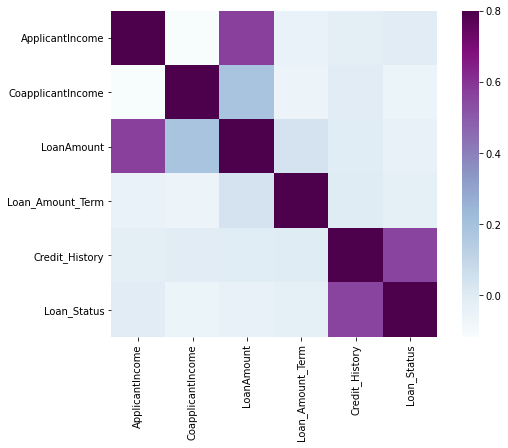

In [167]:
matrix=train.corr() 
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [284]:
# We can see that the most correlated variables are

#ApplicantIncome-LoanAmount
#Credit_History-Loan_Status
#LoanAmount-CoapplicantIncome

test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [171]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [174]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [177]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [179]:
train['Dependents'].mode()

0    0
dtype: object

In [180]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [181]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [182]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [292]:
train['Loan_Amount_Term'].value_counts()

test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.852030
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4.189655
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.867534
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.553877
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.948760
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,4.890349


In [185]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [186]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [187]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [188]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [189]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [286]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [287]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

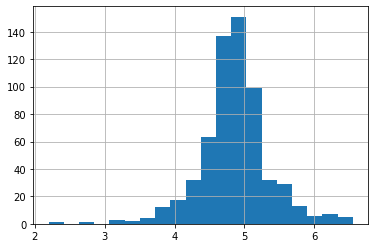

In [194]:
# To eliminate the outliers we  will take a log of the values as the log effects the larger valeus more and the smaller values are east effected.


train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [289]:
test['LoanAmount_log']=np.log(train['LoanAmount'])

test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.852030
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.852030
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4.189655
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.787492
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.867534
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.553877
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.948760
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,4.890349


In [197]:
#Logistic Regression Begins

In [290]:
test=test.drop('Loan_ID',axis=1)

In [205]:
y=train.Loan_Status

In [206]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [320]:
x=train.drop('Loan_Status',1)

In [322]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [323]:
x=train.drop('LoanAmount_log',1)

In [324]:
x=pd.get_dummies(x);x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [332]:
x=train.drop('Loan_Status',1)
x=x.drop('LoanAmount_log',1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [326]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [214]:
train=pd.get_dummies(train)

In [352]:
test=test.drop('LoanAmount_log',axis=1)

In [331]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [333]:
from sklearn.model_selection import train_test_split

In [334]:
x_train, x_cv, y_train, y_cv=train_test_split(x, y, test_size=0.3)

In [335]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
23,3365,1917.0,112.0,360.0,0.0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
113,7451,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
188,674,5296.0,168.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0
518,4683,1915.0,185.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
538,2917,536.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,5250,688.0,160.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
306,3762,1666.0,135.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
380,3333,2500.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
141,5417,0.0,168.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [336]:
x_cv

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
274,3900,0.0,90.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
604,12000,0.0,496.0,360.0,1.0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0
176,2045,1619.0,101.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
345,2499,2458.0,160.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
594,16120,0.0,260.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2667,1625.0,84.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
338,1830,0.0,128.0,360.0,0.0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
139,4200,1430.0,129.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
59,3357,2859.0,144.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1


In [220]:
y_train

141    1
122    1
359    1
530    1
128    0
      ..
597    0
588    1
550    0
206    1
198    1
Name: Loan_Status, Length: 429, dtype: int64

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [338]:
LogisticRegression( C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr', n_jobs=1, penalty='12', random_state=1, solver="liblinear", tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [339]:
pred_cv=model.predict(x_cv)

In [340]:
pred_cv

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [341]:
y_cv

274    1
604    1
176    1
345    1
594    1
      ..
556    1
338    0
139    0
59     1
441    1
Name: Loan_Status, Length: 185, dtype: int64

In [342]:
accuracy_score(y_cv, pred_cv)

0.8378378378378378

In [351]:
pred_test=model.predict(test)

pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [347]:
submission['Loan_Status']=pred_test

In [348]:
submission['Loan_ID']=test_orignal['Loan_ID']

In [349]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [350]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')